In [1]:
import os
import re
import glob
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import scipy.special

from matplotlib import rcParams
# Say, "the default sans-serif font is COMIC SANS"
rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
rcParams['font.family'] = "sans-serif"
rcParams['mathtext.fontset'] = "custom"
rcParams['mathtext.rm'] = 'Arial'
rcParams['mathtext.it'] = 'Arial:italic'
rcParams['mathtext.bf'] = 'Arial:bold'
rcParams['pdf.fonttype'] = 42 # use TrueType fonts for pdf outputs
rcParams['ps.fonttype'] = 42
rcParams['errorbar.capsize'] = 3

plt.rc('font', size=11) #controls default text size
plt.rc('axes', labelsize=13) #fontsize of the x and y labels
plt.rc('xtick', labelsize=11) #fontsize of the x tick labels
plt.rc('ytick', labelsize=11) #fontsize of the y tick labels
plt.rc('legend', fontsize=11) #fontsize of the legend

rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set2.colors)

rcParams['legend.fancybox'] = False # legend box edges are not curved

In [2]:
os.getcwd()

'/home/jkgolla/StormModel'

## Data import and processing

In [3]:
# Import data

os.chdir('Data/')
dryS = pd.read_csv('dryS.csv', parse_dates=['datetime']) # dry season storm data; subset from https://doi.org/10.5281/zenodo.10794567
wetS = pd.read_csv('wetS.csv', parse_dates=['datetime']) # wet season storm data; subset from https://doi.org/10.5281/zenodo.10794567
Q = pd.read_csv('Data_Sapine_Q.csv', parse_dates=['DateHeure'], dayfirst=True) # discharge data
Q.index = Q.DateHeure

# Model results

os.chdir('..')
os.chdir('Storms/')
os.chdir('AntWet/')
os.chdir('Part1/')
nfiles = len(glob.glob1(os.getcwd(),'node*'))
totcon = pd.read_csv('totcon1.out', delim_whitespace=True, skiprows=[0,1])
df_wet1 = []
for i in range(1, nfiles+1):
    df_wet1.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_wet2 = []
for i in range(1, nfiles+1):
    df_wet2.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('AntDry/')
os.chdir('Part1/')
df_dry1 = []
for i in range(1, nfiles+1):
    df_dry1.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_dry2 = []
for i in range(1, nfiles+1):
    df_dry2.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('..')

/tmp/ipykernel_28134/329454453.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  Q = pd.read_csv('Data_Sapine_Q.csv', parse_dates=['DateHeure'], dayfirst=True) # discharge data


In [4]:
# LiSecLow (sensitivity analysis)

os.chdir('Storms_LiSecLow/')
os.chdir('AntWet/')
os.chdir('Part1/')
nfiles = len(glob.glob1(os.getcwd(),'node*'))
totcon = pd.read_csv('totcon1.out', delim_whitespace=True, skiprows=[0,1])
df_wet1_LiSecLow = []
for i in range(1, nfiles+1):
    df_wet1_LiSecLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_wet2_LiSecLow = []
for i in range(1, nfiles+1):
    df_wet2_LiSecLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('AntDry/')
os.chdir('Part1/')
df_dry1_LiSecLow = []
for i in range(1, nfiles+1):
    df_dry1_LiSecLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_dry2_LiSecLow = []
for i in range(1, nfiles+1):
    df_dry2_LiSecLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('..')

In [5]:
# LiSecHigh (sensitivity analysis)

os.chdir('Storms_LiSecHigh/')
os.chdir('AntWet/')
os.chdir('Part1/')
nfiles = len(glob.glob1(os.getcwd(),'node*'))
totcon = pd.read_csv('totcon1.out', delim_whitespace=True, skiprows=[0,1])
df_wet1_LiSecHigh = []
for i in range(1, nfiles+1):
    df_wet1_LiSecHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_wet2_LiSecHigh = []
for i in range(1, nfiles+1):
    df_wet2_LiSecHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('AntDry/')
os.chdir('Part1/')
df_dry1_LiSecHigh = []
for i in range(1, nfiles+1):
    df_dry1_LiSecHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_dry2_LiSecHigh = []
for i in range(1, nfiles+1):
    df_dry2_LiSecHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('..')

In [6]:
# IsoFracLow

os.chdir('Storms_IsoFracLow/')
os.chdir('AntWet/')
os.chdir('Part1/')
nfiles = len(glob.glob1(os.getcwd(),'node*'))
totcon = pd.read_csv('totcon1.out', delim_whitespace=True, skiprows=[0,1])
df_wet1_IsoFracLow = []
for i in range(1, nfiles+1):
    df_wet1_IsoFracLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_wet2_IsoFracLow = []
for i in range(1, nfiles+1):
    df_wet2_IsoFracLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('AntDry/')
os.chdir('Part1/')
df_dry1_IsoFracLow = []
for i in range(1, nfiles+1):
    df_dry1_IsoFracLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_dry2_IsoFracLow = []
for i in range(1, nfiles+1):
    df_dry2_IsoFracLow.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('..')

In [7]:
# IsoFracHigh (sensitivity analysis)

os.chdir('Storms_IsoFracHigh/')
os.chdir('AntWet/')
os.chdir('Part1/')
nfiles = len(glob.glob1(os.getcwd(),'node*'))
totcon = pd.read_csv('totcon1.out', delim_whitespace=True, skiprows=[0,1])
df_wet1_IsoFracHigh = []
for i in range(1, nfiles+1):
    df_wet1_IsoFracHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_wet2_IsoFracHigh = []
for i in range(1, nfiles+1):
    df_wet2_IsoFracHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('AntDry/')
os.chdir('Part1/')
df_dry1_IsoFracHigh = []
for i in range(1, nfiles+1):
    df_dry1_IsoFracHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
os.chdir('..')
os.chdir('Part2/')
df_dry2_IsoFracHigh = []
for i in range(1, nfiles+1):
    df_dry2_IsoFracHigh.append(pd.read_csv('node'+str(i)+'.out', delim_whitespace=True, skiprows=[0,]))
    
os.chdir('..')
os.chdir('..')
os.chdir('..')

In [8]:
# Assign discharge values from discharge data to stream chemistry samples
for i in range(len(wetS)):
    wetS.discharge[i] = Q.loc[str(wetS.datetime.round('H')[i])].Valeur
    
for i in range(len(dryS)):
    dryS.discharge[i] = Q.loc[str(dryS.datetime.round('H')[i])].Valeur

/tmp/ipykernel_28134/2609836069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wetS.discharge[i] = Q.loc[str(wetS.datetime.round('H')[i])].Valeur
/tmp/ipykernel_28134/2609836069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dryS.discharge[i] = Q.loc[str(dryS.datetime.round('H')[i])].Valeur


## Define functions for TTD-RTM

In [9]:
def LN(x,sigma,mu):
    """Lognormal distribution pdf used to simulate storm pulse"""
    y = 1/(x*sigma*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-mu)**2/(2*sigma**2))
    return y

def expTTD(t,T):
    """Exponential travel time distribution"""
    g = 1/T*np.exp(-t/T)
    return g

def decay(x_o,r,x):
    """Decay function used to simulate onset of low-flow conditions"""
    y = (x_o - x_o/10**2) * (1-r) **x + x_o/10**2
    return y

def TTD(df1, df2, storm_type, x, phi, q_base):
    """Function to process Crunch 1-D output and apply TTD weighting"""
    q_base_day = q_base/365.
    if storm_type == 'wet':
        q1 = np.array((q_base_day+(0.035*(LN(df1[0]['Time(day)'],0.25,1.0))))) # in m/day
        q2 = np.array((q_base_day+(0.035*(LN(df2[0]['Time(day)'],0.25,1.0)))))
        q_mmhr = np.append(q1*1000./24., q2*1000./24.) # mm/hour
        q_myr = q_mmhr/1000*365*24 # m/yr
    elif storm_type == 'dry':
        q1 = np.array(decay(q_base_day,0.95,df1[0]['Time(day)'])) # in m/day
        q2 = np.array( (q1[-1] + (0.024*(LN(df2[0]['Time(day)'],0.25,1.0))) ) ) 
        q_mmhr = np.append(q1*1000./24., q2*1000./24.) # mm/hour
        q_myr = q_mmhr/1000*365*24 # m/yr
    df = []
    for i in range(nfiles):
        temp = df1[i].merge(df2[i], how='outer')
        time_max = df2[i]['Time(day)']
        event_duration = time_max.tail(1)
        temp.loc[(range(len(df1[i]), len(temp))), 'Time(day)'] = temp.loc[(range(len(df1[i]), len(temp))), 'Time(day)'] + np.float64(event_duration)
        df.append(temp)
    Time = np.array(df[0]['Time(day)'])
    
    Na_df = []
    Li7_df = []
    Li6_df = []
    for i in range(nfiles):
        Na_df.append(df[i]['Na+'])
        Li7_df.append(df[i]['Li7+'])
        Li6_df.append(df[i]['Li6+'])
    Na_df = pd.DataFrame(Na_df).T # rows span time and columns span depth
    Li7_df = pd.DataFrame(Li7_df).T
    Li6_df = pd.DataFrame(Li6_df).T
    
    Na = np.array([])
    Li7 = np.array([])
    Li6 = np.array([])
    Tau_array = np.array([])
    TTD = []
    for i in range(len(Time)):
        tf = np.array(x)*phi/q_myr[i]
        Tau_base = np.mean(tf)
        Tau_scaler = 1. + np.log10(q_base/q_myr[i]) # apply Tau scaling (discussed in Supplementary Text S4)
        Tau = Tau_base*Tau_scaler # apply Tau scaling (discussed in Supplementary Text S4)
        TTD.append(expTTD(tf, Tau)/np.sum(expTTD(tf, Tau))) # normalized to yield flux-weighting with unit sum
        valueNa = np.sum(Na_df.iloc[i]*expTTD(tf, Tau)/np.sum(expTTD(tf, Tau)))
        valueLi7 = np.sum(Li7_df.iloc[i]*expTTD(tf, Tau)/np.sum(expTTD(tf, Tau)))
        valueLi6 = np.sum(Li6_df.iloc[i]*expTTD(tf, Tau)/np.sum(expTTD(tf, Tau)))
        Na = np.append(Na, valueNa)
        Li7 = np.append(Li7, valueLi7)
        Li6 = np.append(Li6, valueLi6)
        Tau_array = np.append(Tau_array, Tau)
    TTD = pd.DataFrame(TTD) # rows span time and columns span depth
    Li_tot = Li7+Li6
    d7Li = ((Li7/Li6/12.33)-1)*1000
    df_plot = pd.DataFrame([Time, q_mmhr, q_myr, Tau_array, Li7, Li6, Li_tot, Na,  d7Li]).T
    labels = ['Time','q_mmhr','q_myr','Tau','Li7','Li6','Li','Na','d7Li']
    df_plot.columns = labels
    
    return df_plot, Na_df, Li7_df, Li6_df, TTD

## Apply TTD to RTM results

In [10]:
L = 20 # domain length, m
phi = 0.1 # porosity
q_base = 1.4 # Darcy flux at modeled baseflow conditions, m/yr
tf = np.array(totcon.Distance)*phi/q_base

# Reference case
df_wet, Na_raw_wet, Li7_raw_wet, Li6_raw_wet, df_wet_TTD = TTD(df_wet1, df_wet2, storm_type='wet', x=totcon.Distance, phi=0.1, q_base=1.4)
df_dry, Na_raw_dry, Li7_raw_dry, Li6_raw_dry, df_dry_TTD = TTD(df_dry1, df_dry2, storm_type='dry', x=totcon.Distance, phi=0.1, q_base=1.4)

# LiSecLow
df_wet_LiSecLow, Na_raw_wet_LiSecLow, Li7_raw_wet_LiSecLow, Li6_raw_wet_LiSecLow, df_wet_TTD_LiSecLow = TTD(df_wet1_LiSecLow, df_wet2_LiSecLow, storm_type='wet', x=totcon.Distance, phi=0.1, q_base=1.4)
df_dry_LiSecLow, Na_raw_dry_LiSecLow, Li7_raw_dry_LiSecLow, Li6_raw_dry_LiSecLow, df_dry_TTD_LiSecLow = TTD(df_dry1_LiSecLow, df_dry2_LiSecLow, storm_type='dry', x=totcon.Distance, phi=0.1, q_base=1.4)

# LiSecHigh
df_wet_LiSecHigh, Na_raw_wet_LiSecHigh, Li7_raw_wet_LiSecHigh, Li6_raw_wet_LiSecHigh, df_wet_TTD_LiSecHigh = TTD(df_wet1_LiSecHigh, df_wet2_LiSecHigh, storm_type='wet', x=totcon.Distance, phi=0.1, q_base=1.4)
df_dry_LiSecHigh, Na_raw_dry_LiSecHigh, Li7_raw_dry_LiSecHigh, Li6_raw_dry_LiSecHigh, df_dry_TTD_LiSecHigh = TTD(df_dry1_LiSecHigh, df_dry2_LiSecHigh, storm_type='dry', x=totcon.Distance, phi=0.1, q_base=1.4)

# IsoFracLow
df_wet_IsoFracLow, Na_raw_wet_IsoFracLow, Li7_raw_wet_IsoFracLow, Li6_raw_wet_IsoFracLow, df_wet_TTD_IsoFracLow = TTD(df_wet1_IsoFracLow, df_wet2_IsoFracLow, storm_type='wet', x=totcon.Distance, phi=0.1, q_base=1.4)
df_dry_IsoFracLow, Na_raw_dry_IsoFracLow, Li7_raw_dry_IsoFracLow, Li6_raw_dry_IsoFracLow, df_dry_TTD_IsoFracLow = TTD(df_dry1_IsoFracLow, df_dry2_IsoFracLow, storm_type='dry', x=totcon.Distance, phi=0.1, q_base=1.4)

# IsoFracHigh
df_wet_IsoFracHigh, Na_raw_wet_IsoFracHigh, Li7_raw_wet_IsoFracHigh, Li6_raw_wet_IsoFracHigh, df_wet_TTD_IsoFracHigh = TTD(df_wet1_IsoFracHigh, df_wet2_IsoFracHigh, storm_type='wet', x=totcon.Distance, phi=0.1, q_base=1.4)
df_dry_IsoFracHigh, Na_raw_dry_IsoFracHigh, Li7_raw_dry_IsoFracHigh, Li6_raw_dry_IsoFracHigh, df_dry_TTD_IsoFracHigh = TTD(df_dry1_IsoFracHigh, df_dry2_IsoFracHigh, storm_type='dry', x=totcon.Distance, phi=0.1, q_base=1.4)

## Time series of storm simulations (Figure S2)

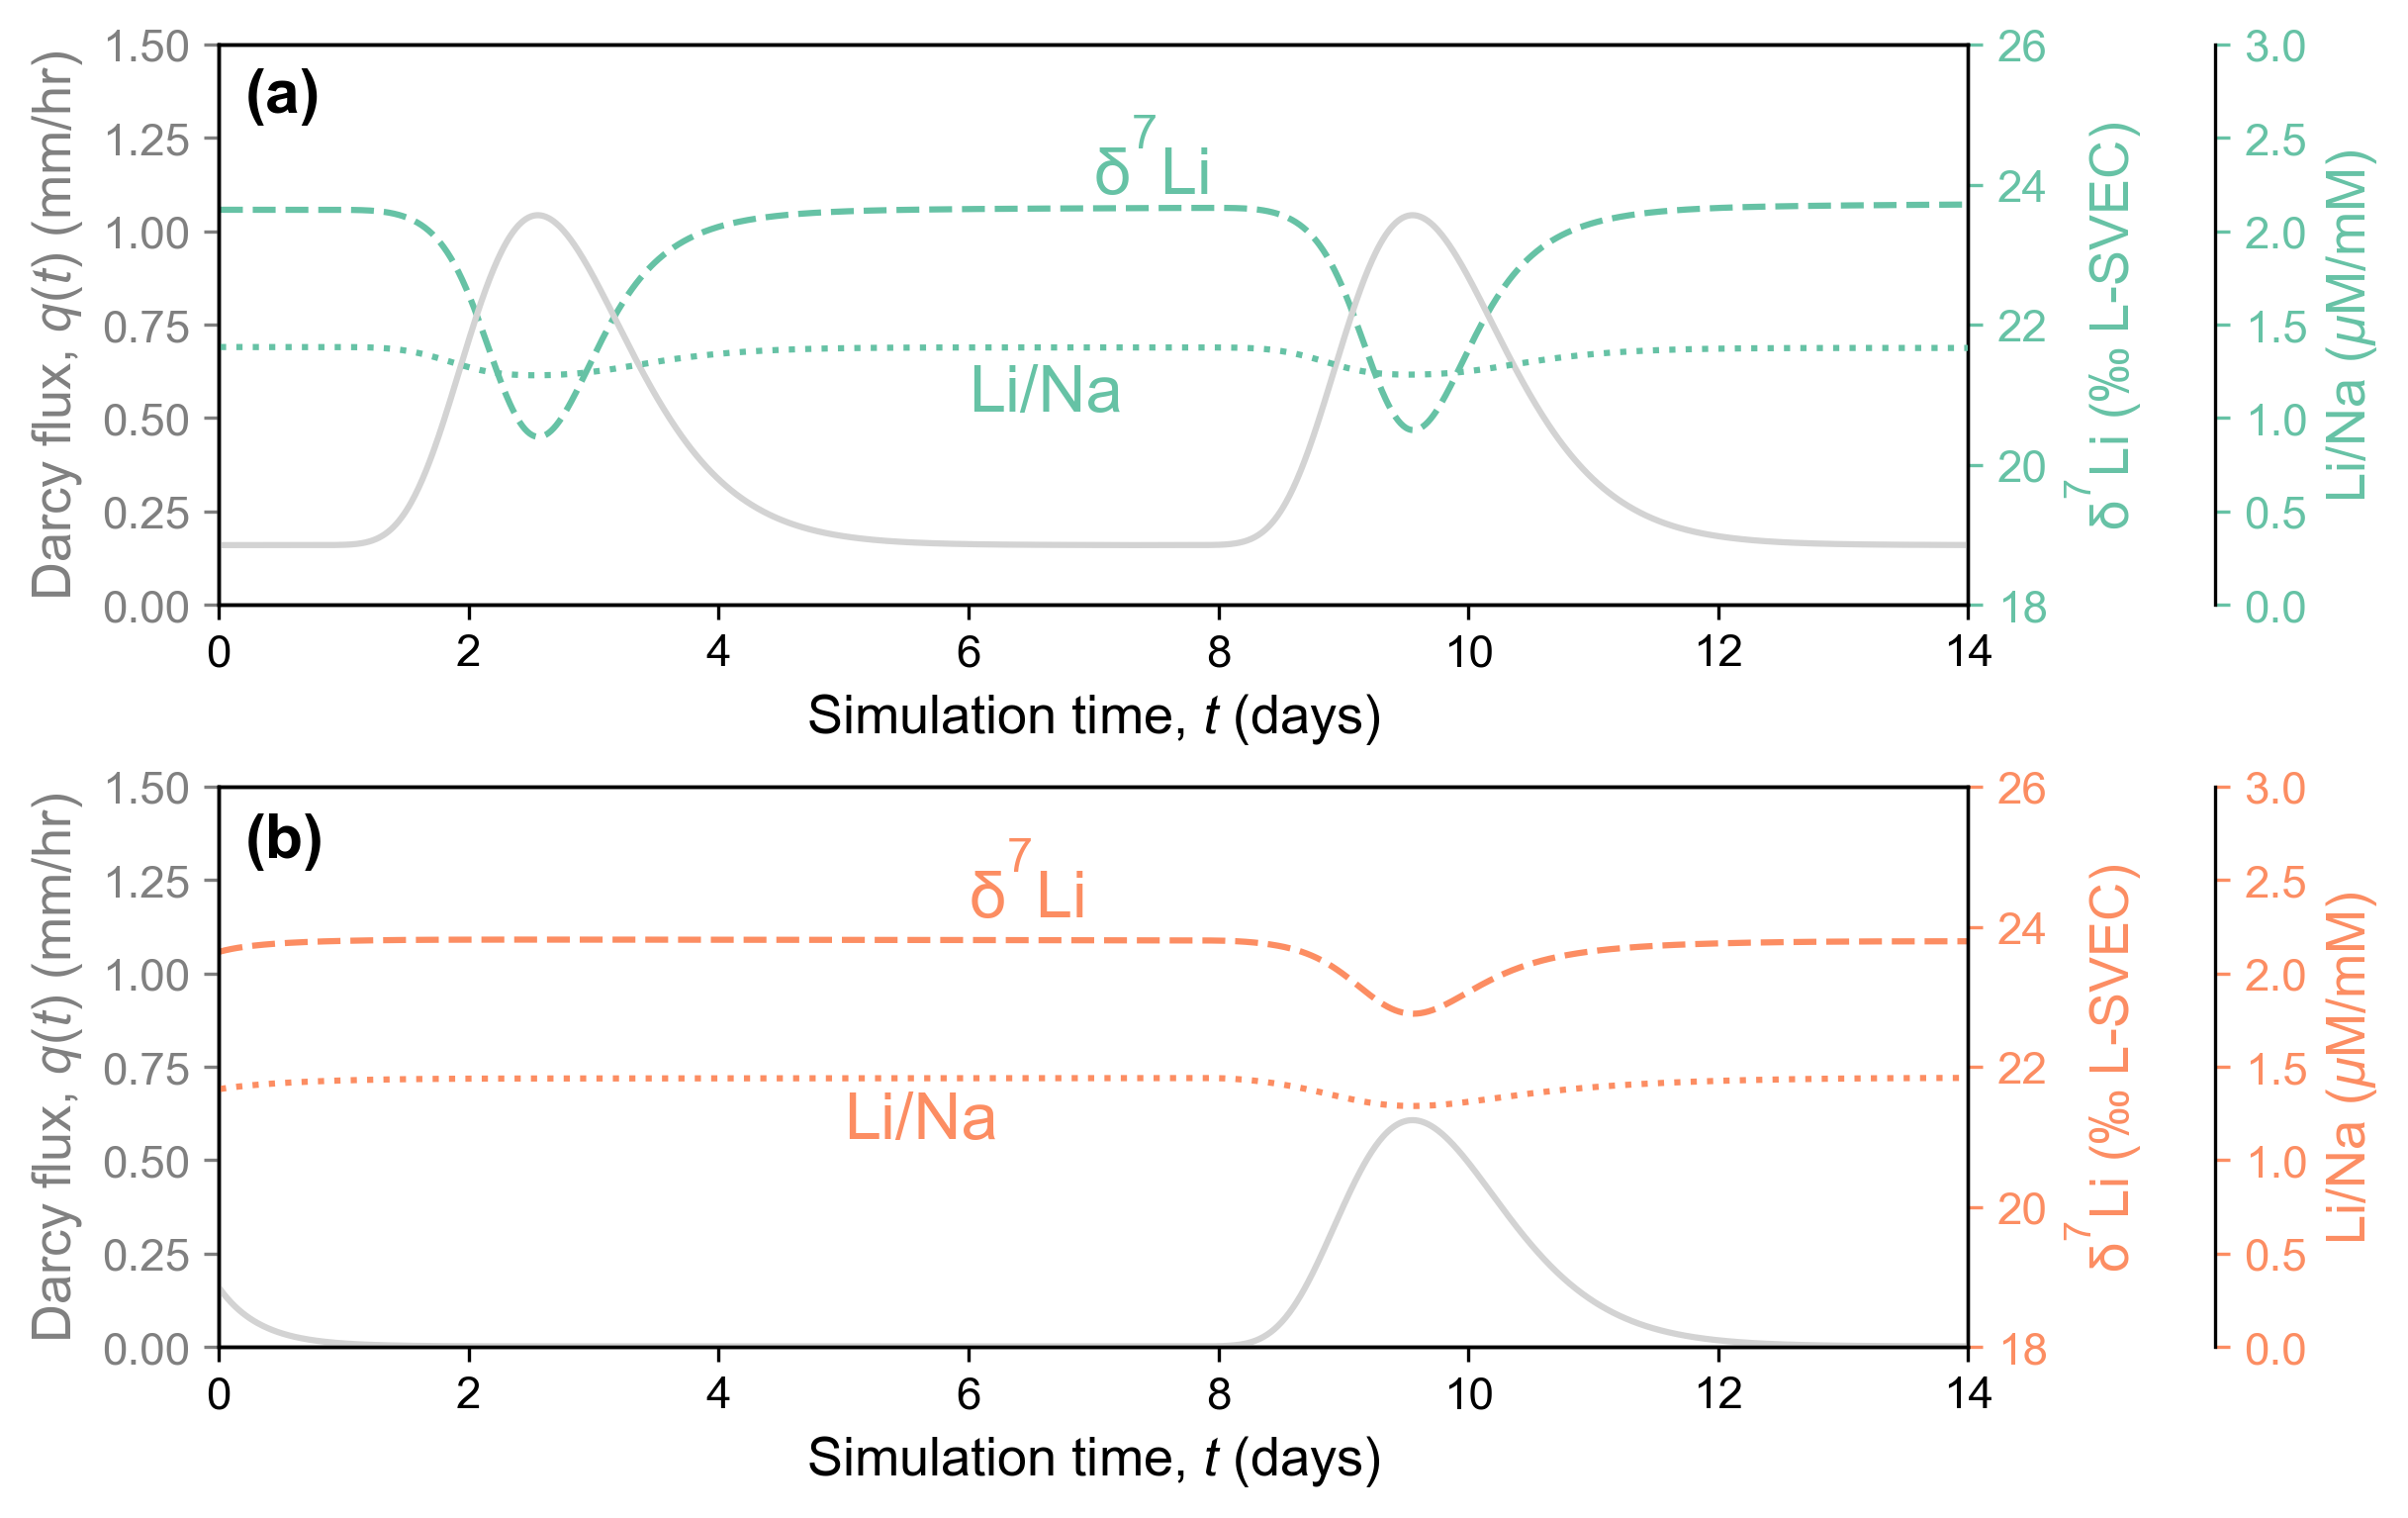

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, dpi=300, figsize=(8, 5), sharex=False, constrained_layout=True)

par1 = ax1.twinx()

ax1.set_ylim(0, 1.5)

ax1.set_ylabel("Darcy flux, $\mathit{q(t)}$ (mm/hr)")
par1.set_ylabel("Li/Na ($\mu$M/mM)", color='C1')
p0, = ax1.plot(df_wet.Time, df_wet.q_mmhr, color='lightgray', linestyle='-')

##############################################################################################
# # twin object for two different y-axis on the sample plot
ax1dup=ax1.twinx()

# Set ax's patch invisible
ax1.patch.set_visible(False)
# Set axtwin's patch visible and colorize it in grey
ax1dup.patch.set_visible(True)
ax1dup.patch.set_facecolor('w')
# move ax in front
ax1.set_zorder(ax1dup.get_zorder() + 1)
par1.patch.set_visible(False)
par1.set_zorder(ax1dup.get_zorder() + 1)

# # make a plot with different y-axis using second axis object
p1, = ax1dup.plot(df_wet.Time, df_wet.d7Li, color='C0', linestyle='--', alpha=1)
par1.set_ylabel("Li/Na ($\mu$M/mM)", color='C0')
ax1dup.invert_yaxis()
ax1dup.set_ylabel("δ$^7$Li (‰ L-SVEC)")
##############################################################################################

p2, = par1.plot(df_wet.Time, df_wet.Li/df_wet.Na*1000, color='C0', linestyle=':', alpha=1)

par1.set_ylim(0, 3)
ax1dup.set_ylim(18, 26)
par1.spines['right'].set_position(('outward', 60))  


ax1.yaxis.label.set_color('gray')
ax1.yaxis.set_tick_params(colors='gray')
ax1dup.yaxis.label.set_color(p1.get_color())
ax1dup.yaxis.set_tick_params(colors=p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par1.yaxis.set_tick_params(colors=p2.get_color())

ax1.set_xlabel('Simulation time, $\mathit{t}$ (days)')
ax1.set_xlim(0, 14)

ax1.text(6, 0.52, 'Li/Na', color='C0', fontsize=16)
ax1.text(7, 1.1, 'δ$^7$Li', color='C0', fontsize=16)

ax1.annotate("(a)", xy=(0.015, 0.88), xycoords="axes fraction", fontweight='bold', fontsize=15)

##############################DRY SEASON STORM#################################################
##############################DRY SEASON STORM#################################################

par1 = ax2.twinx()

ax2.set_ylim(0, 1.5)

ax2.set_ylabel("Darcy flux, $\mathit{q(t)}$ (mm/hr)")
par1.set_ylabel("Li/Na ($\mu$M/mM)", color='C1')
p0, = ax2.plot(df_dry.Time, df_dry.q_mmhr, color='lightgray', linestyle='-')

##############################################################################################
# # twin object for two different y-axis on the sample plot
ax2dup=ax2.twinx()

# Set ax's patch invisible
ax2.patch.set_visible(False)
# Set axtwin's patch visible and colorize it in grey
ax2dup.patch.set_visible(True)
ax2dup.patch.set_facecolor('w')
# move ax in front
ax2.set_zorder(ax2dup.get_zorder() + 1)
par1.patch.set_visible(False)
par1.set_zorder(ax2dup.get_zorder() + 1)

# # make a plot with different y-axis using second axis object
p1, = ax2dup.plot(df_dry.Time, df_dry.d7Li, color='C1', linestyle='--', alpha=1)
ax2dup.set_ylabel("δ$^7$Li (‰ L-SVEC)")
ax2dup.invert_yaxis()
ax2dup.set_ylim(18, 26)
##############################################################################################

p2, = par1.plot(df_dry.Time, df_dry.Li/df_dry.Na*1000, color='C1', linestyle=':', alpha=1)

par1.set_ylim(0, 3)
par1.spines['right'].set_position(('outward', 60))  

ax2.yaxis.label.set_color('gray')
ax2.yaxis.set_tick_params(colors='gray')
ax2dup.yaxis.label.set_color(p1.get_color())
ax2dup.yaxis.set_tick_params(colors=p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par1.yaxis.set_tick_params(colors=p2.get_color())

ax2.set_xlim(0, 14)
ax2.set_xlabel('Simulation time, $\mathit{t}$ (days)')

ax2.text(5, 0.56, 'Li/Na', color='C1', fontsize=16)
ax2.text(6., 1.15, 'δ$^7$Li', color='C1', fontsize=16)

ax2.annotate("(b)", xy=(0.015, 0.875), xycoords="axes fraction", fontweight='bold', fontsize=15)

plt.savefig('ModelStorms.pdf', dpi=300, bbox_inches = 'tight')

## Effect of dynamic Darcy flux, q(t), on simulated subsurface chemistry and resulting TTD flux weighting (Figure 2)

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


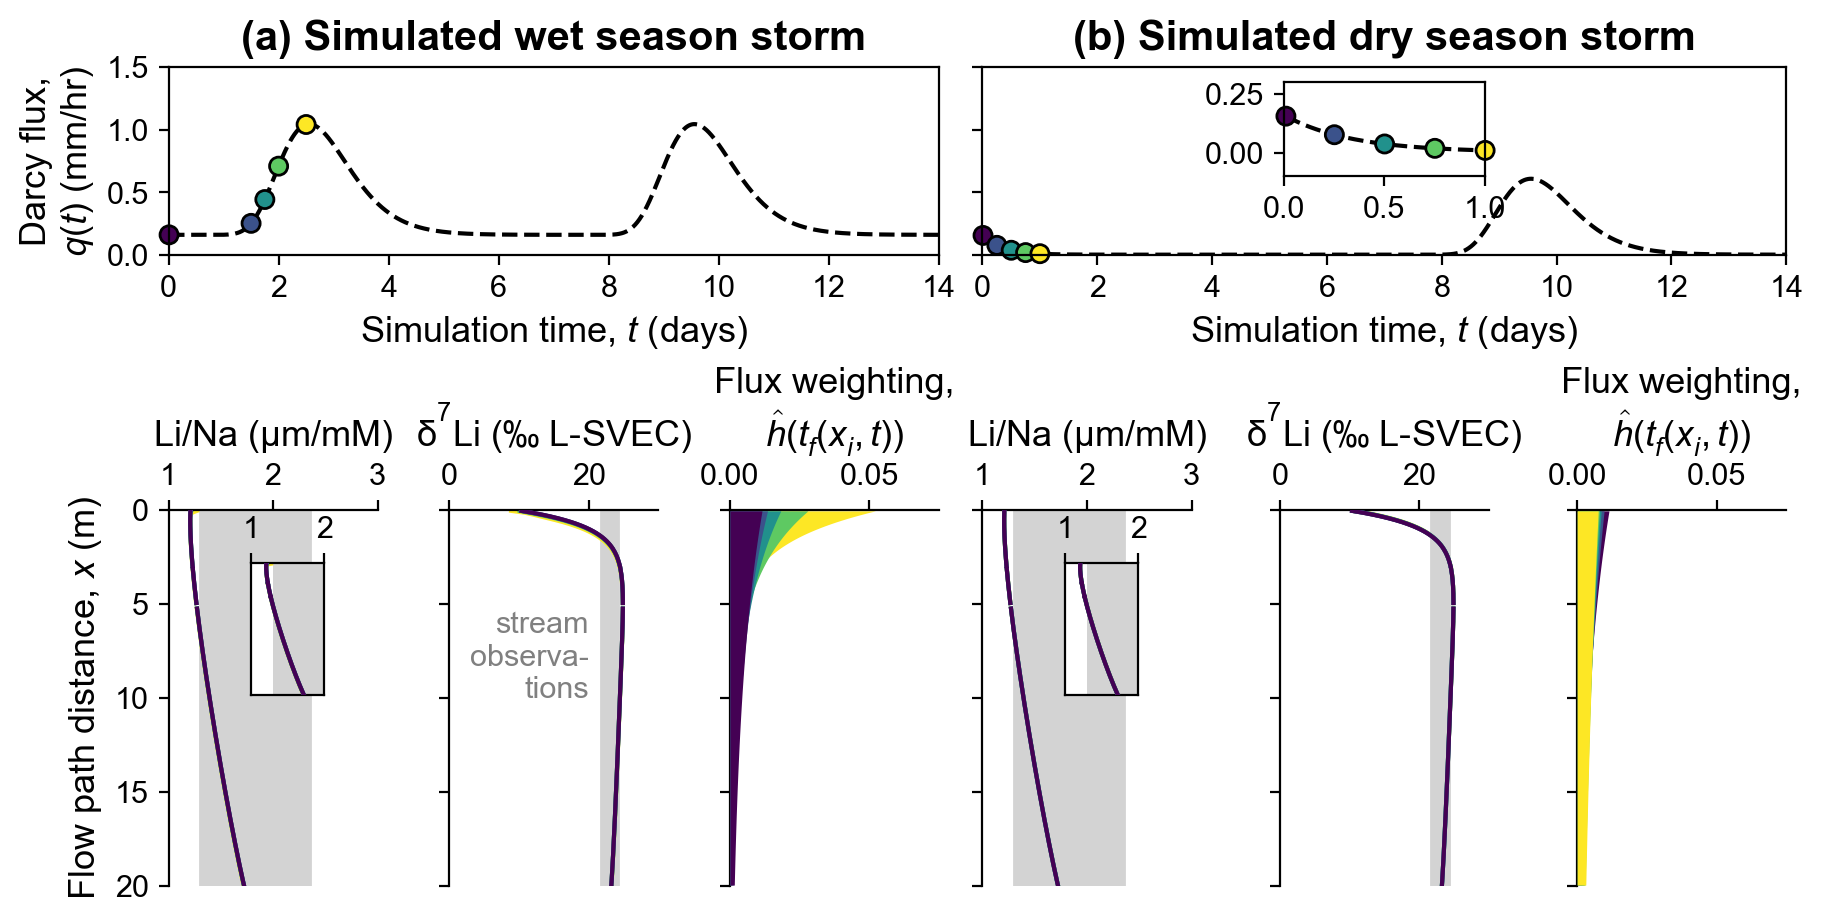

In [12]:
fig = plt.figure(dpi=200, figsize=(9, 4.5), constrained_layout=True)

tstamps_wet = [df_wet.index[df_wet.Time == 0.01], df_wet.index[df_wet.Time == 1.5], df_wet.index[df_wet.Time == 1.75], df_wet.index[df_wet.Time == 2.], df_wet.index[df_wet.Time == 2.5]]
t_wet = np.array(tstamps_wet).reshape(len(tstamps_wet))
colors = plt.cm.viridis(np.linspace(0,1,len(tstamps_wet)))

ax1 = plt.subplot2grid((3, 6), (0, 0), colspan=3)
ax1.scatter(df_wet.Time[t_wet], df_wet.q_mmhr[t_wet],
            marker='.', s=170, c=np.arange(len(colors)), cmap='viridis', edgecolor='k', linewidth=1, alpha=1, zorder=1, clip_on=False)
ax1.plot(df_wet.Time, df_wet.q_mmhr, color='k', linestyle='--', zorder=0)
ax1.set_ylim(0, 1.5)
ax1.set_xlim(0, 14)
ax1.set_ylabel("Darcy flux,\n$\mathit{q(t)}$ (mm/hr)")
ax1.set_xlabel("Simulation time, $\mathit{t}$ (days)")

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

ax2 = plt.subplot2grid((3, 6), (1, 0), rowspan=2)
ax2.set_ylim(20, 0)
ax2.set_xlim(1, 3)
ax2.set_ylabel('Flow path distance, $\mathit{x}$ (m)')
ax2.set_title('Li/Na ($\mathrm{\mu}$m/mM)', fontsize=13)
ax2.spines.right.set_visible(False)
ax2.spines.bottom.set_visible(False)
ax2ins = inset_axes(ax2, width="35%", height="35%", loc="upper right", borderpad=1.75)
ax2ins.set_yticks([])
ax2ins.axvspan(1.3, 2.35, color='lightgray', zorder=0, alpha=1, linewidth=0)
ax2ins.set_ylim(20, 0)
ax2ins.set_xlim(1, 2)

ax3 = plt.subplot2grid((3, 6), (1, 1), rowspan=2)
ax3.set_ylim(20, 0)
ax3.set_xlim(0, 30)
ax3.set_title('$\mathrm{\delta}$$^7$Li (‰ L-SVEC)', fontsize=13)
ax3.spines.right.set_visible(False)
ax3.spines.bottom.set_visible(False)
ax3.set_yticklabels([])

ax4 = plt.subplot2grid((3, 6), (1, 2), rowspan=2)
ax4.set_ylim(20, 0)
ax4.set_xlim(0, 0.075)
ax4.set_title('Flux weighting,\n$\hat{h}(t_f(x_i,t))$', fontsize=13)
ax4.spines.right.set_visible(False)
ax4.spines.bottom.set_visible(False)
ax4.set_yticklabels([])

ax2.axvspan(1.3, 2.35, color='lightgray')
ax3.axvspan(21.7, 24.2, color='lightgray')
ax3.text(20, 10., 'stream\nobserva-\ntions', horizontalalignment='right', color='gray')

for i,c,ctr in zip(t_wet, range(len(colors)), [5, 4, 3, 2, 1]):
    ax2.plot((Li7_raw_wet.iloc[i].values+Li6_raw_wet.iloc[i].values).reshape(nfiles)/Na_raw_wet.iloc[i].values.reshape(nfiles)*1000, totcon.Distance,
             linestyle='-', color=colors[c], alpha=1, zorder=ctr)
    ax2ins.plot((Li7_raw_wet.iloc[i].values+Li6_raw_wet.iloc[i].values).reshape(nfiles)/Na_raw_wet.iloc[i].values.reshape(nfiles)*1000, totcon.Distance,
             linestyle='-', color=colors[c], alpha=1, zorder=ctr)
    ax3.plot((((Li7_raw_wet.iloc[i].values/Li6_raw_wet.iloc[i].values).reshape(nfiles)/12.33)-1)*1000, totcon.Distance,
             linestyle='-', color=colors[c], alpha=1, zorder=ctr)
    ax4.fill_betweenx(y=totcon.Distance, x1=df_wet_TTD.iloc[i].values.reshape(nfiles), x2=0, linewidth=0, color=colors[c], alpha=1, zorder=ctr)

# fig.suptitle('(a) Simulated wet season storm', fontweight='bold', fontsize=15)
ax1.set_title('(a) Simulated wet season storm', fontweight='bold', fontsize=15)

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

##########################################################################################################################################

tstamps_dry = [df_dry.index[df_dry.Time == 0.01], df_dry.index[df_dry.Time == 0.251139], df_dry.index[df_dry.Time == 0.501139], df_dry.index[df_dry.Time == 0.751139], df_dry.index[df_dry.Time == 1.001140]]
t_dry = np.array(tstamps_dry).reshape(len(tstamps_dry))
colors = plt.cm.viridis(np.linspace(0,1,len(tstamps_dry)))

ax5 = plt.subplot2grid((3, 6), (0, 3), colspan=3)
ax5.scatter(df_dry.Time[t_dry], df_dry.q_mmhr[t_dry],
            marker='.', s=170, c=np.arange(len(colors)), edgecolor='k', linewidth=1, alpha=1, zorder=1, clip_on=False)
ax5.plot(df_dry.Time, df_dry.q_mmhr, color='k', linestyle='--', zorder=0)
ax5.set_ylim(0, 1.5)
ax5.set_xlim(0, 14)
# ax5.set_ylabel("Darcy flux,\n$\mathit{q(t)}$ (mm/hr)")
ax5.set_yticklabels([])
ax5.set_xlabel("Simulation time, $\mathit{t}$ (days)")

ax5ins = inset_axes(ax5, width="25%", height="50%", loc="upper center")
ax5ins.scatter(df_dry.Time[t_dry], df_dry.q_mmhr[t_dry],
            marker='.', s=170, c=np.arange(len(colors)), edgecolor='k', linewidth=1, alpha=1, zorder=1, clip_on=False)
ax5ins.plot(df_dry.Time, df_dry.q_mmhr, color='k', linestyle='--', zorder=0)
ax5ins.set_ylim(-0.1, 0.3)
ax5ins.set_xlim(0, 1)

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

ax6 = plt.subplot2grid((3, 6), (1, 3), rowspan=2)
ax6.set_ylim(20, 0)
ax6.set_xlim(1, 3)
# ax6.set_ylabel('Flow path distance, $\mathit{x}$ (m)')
ax6.set_title('Li/Na ($\mathrm{\mu}$m/mM)', fontsize=13)
ax6.set_yticklabels([])
ax6.spines.right.set_visible(False)
ax6.spines.bottom.set_visible(False)
ax6ins = inset_axes(ax6, width="35%", height="35%", loc="upper right", borderpad=1.75)
ax6ins.set_yticks([])
ax6ins.axvspan(1.3, 2.35, color='lightgray', zorder=0, alpha=1, linewidth=0)
ax6ins.set_ylim(20, 0)
ax6ins.set_xlim(1, 2)

ax7 = plt.subplot2grid((3, 6), (1, 4), rowspan=2)
ax7.set_ylim(20, 0)
ax7.set_xlim(0, 30)
ax7.set_title('$\mathrm{\delta}$$^7$Li (‰ L-SVEC)', fontsize=13)
ax7.spines.right.set_visible(False)
ax7.spines.bottom.set_visible(False)
ax7.set_yticklabels([])

ax8 = plt.subplot2grid((3, 6), (1, 5), rowspan=2)
ax8.set_ylim(20, 0)
ax8.set_xlim(0, 0.075)
ax8.set_title('Flux weighting,\n$\hat{h}(t_f(x_i,t))$', fontsize=13)
ax8.spines.right.set_visible(False)
ax8.spines.bottom.set_visible(False)
ax8.set_yticklabels([])

for i,c,ctr in zip(t_dry, range(len(colors)), [5, 4, 3, 2, 1]):
    ax6.plot((Li7_raw_dry.iloc[i].values+Li6_raw_dry.iloc[i].values).reshape(nfiles)/Na_raw_dry.iloc[i].values.reshape(nfiles)*1000, totcon.Distance,
             linestyle='-', color=colors[c], alpha=1, zorder=ctr)
    ax6ins.plot((Li7_raw_dry.iloc[i].values+Li6_raw_dry.iloc[i].values).reshape(nfiles)/Na_raw_dry.iloc[i].values.reshape(nfiles)*1000, totcon.Distance,
             linestyle='-', color=colors[c], alpha=1, zorder=ctr)
    ax7.plot((((Li7_raw_dry.iloc[i].values/Li6_raw_dry.iloc[i].values).reshape(nfiles)/12.33)-1)*1000, totcon.Distance,
             linestyle='-', color=colors[c], alpha=1, zorder=ctr)
    ax8.fill_betweenx(y=totcon.Distance, x1=df_dry_TTD.iloc[i].values.reshape(nfiles), x2=0, linewidth=0, color=colors[c], alpha=1, zorder=c)
    
ax6.axvspan(1.3, 2.35, color='lightgray')
ax7.axvspan(21.7, 24.2, color='lightgray')
# ax7.text(20, 10., 'range of\nobservations\nin stream', horizontalalignment='right', color='gray')

# fig.suptitle('(a) Simulated dry season storm', fontweight='bold', fontsize=15)
ax5.set_title('(b) Simulated dry season storm', fontweight='bold', fontsize=15)

plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = False

fig.savefig('RTM.pdf', dpi=300, bbox_inches = 'tight')

## Model-data comparison (Figure 3)

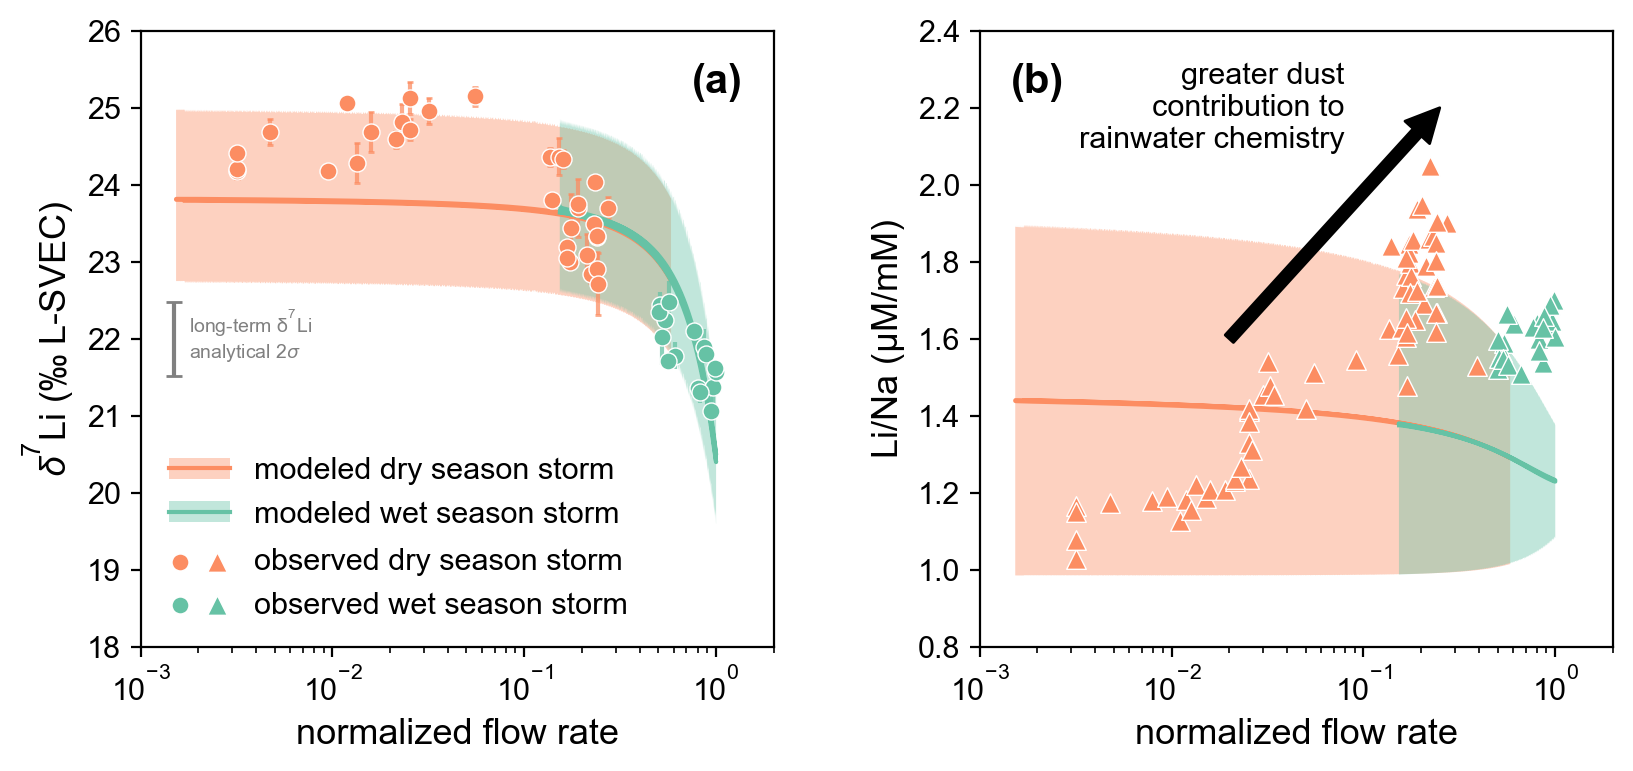

In [13]:
# Long-term analytical uncertainty estimated from replicate measurements (n=45) of a proxy reference material
d7Li_2sigma = 0.48

fig, (ax1, ax2) = plt.subplots(1, 2, dpi=200, figsize=(9.5,4), constrained_layout=False)

# ax.plot(df_dry.q_mmhr/np.max(df_wet.q_mmhr), df_dry.d7Li)
df_dry_IsoFracLow.sort_values(by="q_mmhr", inplace=True)
df_dry_IsoFracHigh.sort_values(by="q_mmhr", inplace=True)
df_wet_IsoFracLow.sort_values(by="q_mmhr", inplace=True)
df_wet_IsoFracHigh.sort_values(by="q_mmhr", inplace=True)
df_dry_LiSecLow.sort_values(by="q_mmhr", inplace=True)
df_dry_LiSecHigh.sort_values(by="q_mmhr", inplace=True)
df_wet_LiSecLow.sort_values(by="q_mmhr", inplace=True)
df_wet_LiSecHigh.sort_values(by="q_mmhr", inplace=True)

test = pd.concat([df_dry_IsoFracLow, df_dry_IsoFracHigh])

f1=ax1.fill_between(df_dry_IsoFracLow.q_mmhr/np.max(df_wet.q_mmhr),
                 df_dry_IsoFracLow.d7Li, df_dry_IsoFracHigh.d7Li,
                 facecolor='C1', zorder=0, alpha=0.4)
f2=ax1.fill_between(df_wet_IsoFracHigh.q_mmhr/np.max(df_wet.q_mmhr),
                 df_wet_IsoFracLow.d7Li, df_wet_IsoFracHigh.d7Li,
                 facecolor='C0', zorder=0, alpha=0.4)

o1=ax1.scatter(dryS.discharge/np.max(wetS.discharge), dryS.d7Li, marker='.', color='C1', edgecolor='white', linewidth=0.5, zorder=2, label='observations', s=150)
ax1.errorbar(dryS.discharge/np.max(wetS.discharge), dryS.d7Li, dryS['2SD'], 0, linestyle='', color='C1', zorder=0, alpha=0.75, capsize=1)
p1,=ax1.plot(df_dry.q_mmhr/np.max(df_wet.q_mmhr), df_dry.d7Li, linestyle='-', color='C1', zorder=1)
ob1=ax1.scatter(wetS.discharge/np.max(wetS.discharge), wetS.d7Li, marker='.', color='C0', edgecolor='white', linewidth=0.5, zorder=2, s=150)
ax1.errorbar(wetS.discharge/np.max(wetS.discharge), wetS.d7Li, wetS['2SD'], 0, linestyle='', color='C0', zorder=1, alpha=0.75, capsize=0)
p2,=ax1.plot(df_wet.q_mmhr/np.max(df_wet.q_mmhr), df_wet.d7Li, linestyle='-', color='C0', zorder=1)

o2 = ax1.scatter(wetS.discharge/np.max(wetS.discharge), wetS.Li/wetS.Na/7*23*1000, marker='^', color='C1', edgecolor='white', linewidth=0.5, zorder=1, s=50) # dummy for legend
ob2 = ax1.scatter(wetS.discharge/np.max(wetS.discharge), wetS.Li/wetS.Na/7*23*1000, marker='^', color='C0', edgecolor='white', linewidth=0.5, zorder=1, s=50) # dummy for legend

ax1.errorbar(0.0015, 22, d7Li_2sigma, 0, linestyle='', color='gray', zorder=3)
ax1.text(0.0018, 21.75, 'long-term $\mathrm{\delta}^7$Li\nanalytical '+r'2$\sigma$', fontsize=7, color='gray', horizontalalignment='left', bbox=dict(facecolor='none', edgecolor='none'))

ax1.set_ylabel('$\delta$$^7$Li (‰ L-SVEC)')
ax1.set_xlabel('normalized flow rate')

ax1.set_ylim(18, 26)
ax1.set_xlim(0.001, 2)
ax1.set_xscale('log')
ax1.annotate("(a)", xy=(0.87, 0.9), xycoords="axes fraction", fontweight='bold', fontsize=15)

legax1 = ax1.legend([(o1, o2), (ob1,ob2)], ['observed dry season storm','observed wet season storm'],
                    loc="lower left", ncol=1, facecolor="white", edgecolor="None", framealpha=1,
                    handler_map={tuple: HandlerTuple(ndivide=None)})
ax1.add_artist(legax1)

ax1.legend([(p1,f1), (p2,f2)], ['modeled dry season storm', 'modeled wet season storm'],
           loc=(0.025,0.1725), ncol=1, facecolor="white", edgecolor="None", framealpha=1)

ax2.fill_between(df_dry_LiSecLow.q_mmhr/np.max(df_wet.q_mmhr),
                 df_dry_LiSecLow.Li/df_dry_LiSecLow.Na*1000,
                 df_dry_LiSecHigh.Li/df_dry_LiSecHigh.Na*1000,
                 facecolor='C1', zorder=0, alpha=0.4)
ax2.fill_between(df_wet_LiSecLow.q_mmhr/np.max(df_wet.q_mmhr),
                 df_wet_LiSecLow.Li/df_wet_LiSecLow.Na*1000,
                 df_wet_LiSecHigh.Li/df_wet_LiSecHigh.Na*1000,
                 facecolor='C0', zorder=0, alpha=0.4)

ax2.plot(df_dry.q_mmhr/np.max(df_wet.q_mmhr), df_dry.Li/df_dry.Na*1000, linestyle='-', color='C1', zorder=0)
ax2.plot(df_wet.q_mmhr/np.max(df_wet.q_mmhr), df_wet.Li/df_wet.Na*1000, linestyle='-', color='C0', zorder=0)
ax2.scatter(dryS.discharge/np.max(wetS.discharge), dryS.Li/dryS.Na/7*23*1000, marker='^', color='C1', edgecolor='white', linewidth=0.5, zorder=1, s=50)
ax2.scatter(wetS.discharge/np.max(wetS.discharge), wetS.Li/wetS.Na/7*23*1000, marker='^', color='C0', edgecolor='white', linewidth=0.5, zorder=1, s=50)
ax2.annotate('', xytext = (0.02, 1.6),xy = (0.25, 2.2),
             ha = 'center', va = 'center',
             arrowprops = {'facecolor' : 'black', 'edgecolor' : 'black'})

ax2.text(0.08, 2.2, 'greater dust\ncontribution to\nrainwater chemistry', ha='right', va='center')

ax2.set_ylabel('Li/Na ($\mathrm{\mu}$M/mM)')
ax2.set_xlabel('normalized flow rate')

ax2.set_ylim(0.8, 2.4)
ax2.set_xlim(0.001, 2)
ax2.set_xscale('log')
ax2.annotate("(b)", xy=(0.05, 0.9), xycoords="axes fraction", fontweight='bold', fontsize=15)

fig.subplots_adjust(wspace=0.325)

fig.savefig('RCQ.pdf', dpi=300, bbox_inches = 'tight')